# Color in *The Moonstone* and "The Garden Party and Other Short Stories"

## Xiaorui Liu

14 August 2022

Introduction to Computational Literary Analysis

Department of Digital Humanities, University of California, Berkeley

Instructor: Jonathan Reeve

In [156]:
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk
import matplotlib.colors
import pandas as pd
import numpy as np
import nltk 
import matplotlib as mpl
import matplotlib.pyplot as plt


# Retrieve texts
moonstone = open('/Users/xiaorui/course-computational-literary-analysis/Texts/moonstone.md').read()
gardenParty = open('/Users/xiaorui/course-computational-literary-analysis/Texts/garden-party.md').read()

Color has long been used in various forms of art, often being used to further explore, emphasize, or develop an artist's vision. Examples of this include the resurgence of pastel colors in the impressionist era or the intentional monochromatization of photographs. 

In this project, an analysis of the utilization of words that indicate coloration is performed on fictional literature, specifically analyzing the similarities and differences of frequency and usage in the novel *The Moonstone* by Wilkie Collins and Katherine Mansfield's "The Garden Party and Other Stories". The differences in frequency indicate a distinct difference between the creation and pacing of traditional novels and short stories. The ability to develop the plot and the freedom of a larger word count diminishes the need to overload descriptions with color words in novels. Conversely, Mansfield poignantly utilizes recognizable colors to quickly set the scene and connect with overarching subjects in the short stories like nature. Furthermore, the subject matter of the literature impacts the number of color terms used. *The Moonstone* heavily emphasizes being a mystery and thus a lot of attention is put on the interactions between characters and the overarching movement of the plot, while "The Garden Party and Other Stories" is romantic in nature, focusing on the character's environments and the lessons that can be derived from their experiences with other characters and their settings. Despite these differences, their utilizations are largely similar. In both mediums, color is used not only to vitalize the setting through description but also to employ color symbolism. The colors set the tone, foreshadow, and even indicate a larger overarching association of certain colors to certain moods, feelings, or symbols. 

In [125]:
narrativeBoundaries = {
    "Betteredge": [("The events related by GABRIEL BETTEREDGE", "## Second Period"),
                   ("Contributed by GABRIEL BETTEREDGE", "## Epilogue")],
    "Clack": [("Contributed by MISS CLACK", "## Second Narrative")],
    "Bruff": [("Contributed by MATHEW BRUFF", "## Third Narrative")],
    "Blake": [("Contributed by FRANKLIN BLAKE", "## Fourth Narrative"),
              ("The Story Resumed by FRANKLIN BLAKE", "## Sixth Narrative")],
    "Jennings": [("Extracted from the Journal of EZRA JENNINGS", "## Fifth Narrative")],
    "Cuff": [("Contributed by SERGEANT CUFF", "## Seventh Narrative")],
    "Candy": [("In a Letter from MR. CANDY", "## Eighth Narrative")],
}
 
shortStoryBoundaries = {
    "At the Bay": [("Very early morning. The sun was not yet risen,", "# 2. THE GARDEN PARTY.")],
    "The Garden Party": [("And after all the weather was ideal.", "# 3. THE DAUGHTERS OF THE LATE COLONEL.")],
    "The Daughters of the Late Colonel": [("The week after was one of the busiest weeks of their lives.", "# 4. MR. AND MRS. DOVE.")],
    "Mr. and Mrs. Dove": [("Of course he knew---no man better---that he hadn't a ghost of a chance,", "# 5. THE YOUNG GIRL.")],
    "The Young Girl": [("In her blue dress, with her cheeks lightly flushed,", "# 6. LIFE OF MA PARKER.")],
    "Life of Ma Parker": [("When the literary gentleman, whose flat old Ma Parker cleaned", "# 7. MARRIAGE A LA MODE.")],
    "Marriage a la Mode": [("On his way to the station William remembered with a fresh pang", "# 8. THE VOYAGE.")],
    "The Voyage": [("The Picton boat was due to leave at half-past eleven.", "# 9. MISS BRILL.")],
    "Miss Brill": [("Although it was so brilliantly fine---the blue sky powdered", "# 10. HER FIRST BALL.")],
    "Her First Ball": [("Exactly when the ball began Leila would have found it hard to say.", "# 11. THE SINGING LESSON.")],
    "The Singing Lesson": [("With despair---cold, sharp despair---buried deep in her heart", "# 12. THE STRANGER")],
    "The Stranger": [("It seemed to the little crowd on the wharf", "# 13. BANK HOLIDAY.")],
    "Bank Holiday": [("A stout man with a pink face wears dingy white", "# 14. AN IDEAL FAMILY.")],
    "An Ideal Family": [("That evening for the first time in his life,", "# 15. The Lady's Maid")],
    "The Lady's Maid": [("Eleven o'clock. A knock at the door\...", "If you can't find anything better to do than to start thinking!\...")]
}


In [126]:
def getText(boundaryDict, book, dict):
    for name in boundaryDict:
        narratorText = ""
        for tuple in boundaryDict[name]:
            start = tuple[0]
            end = tuple[1]
            # Find location of text and add onto the narrator text, add to dictionary after
            startLocation = book.find(start)
            endLocation = book.find(end)
            textChunk = book[startLocation:endLocation]
            narratorText += textChunk  
        dict[name] = narratorText

moonstoneNarrators = {}
getText(narrativeBoundaries, moonstone, moonstoneNarrators)
gardenPartyStories = {}
getText(shortStoryBoundaries, gardenParty, gardenPartyStories)

def merge(dict1, dict2):
    return {**dict1, **dict2}

# A dictionary of all the narrators/short stories in one for ease of computing
allTexts = merge(moonstoneNarrators, gardenPartyStories)

Firstly, the texts are imported and separated into their respective narrators/short story titles. This was done to capture the differences that a new narrator/short story would have, as each has a unique character/plot behind them. Additionally, this made for a more straightforward approach to the tabulation of the various color terms. 

The colors are extracted by finding a collection of words that indicate coloration through WordNet's database. To get these words, the synsets of "chromatic_color" (coordinating with colors with hues like blue, green, and red) and "achromatic_color" (coordinating with colors without hues like black, white, and grey) were used. Trees were made of the synset's hyponyms and the lemmas were collected, as fortunately, the hyponyms of "chromatic_color" and "achromatic_color" were color terms. For the words to remove, these are ambiguous terms that are specific to the two collections of texts, thus making this method hard to scale up to processing large amounts of texts. For example, the term "rose" not only refers to the flower (most commonly used in the *The Moonstone*), the past-tense of "rise", but also the color. Luckily, after inspecting its usage throughout the novel, it was never used as a color term so its removal didn't impact the counts too much. This example is similar to most of the words that were removed, often being used as nouns instead of adjectives describing things. 

Although intuitively there are ways to use word processing to parse through these ambiguous cases, the two solutions that were attempted were not successful. The first involved the utilization of the NLTK part of speech (pos) tagging system to filter out when words were used as nouns versus adjectives. Unfortunately, after testing the pos tagging was not accurate, often misclassifying ambiguous words as only nouns. The NLTK WSD Lesk algorithm was also tested to see if it could perhaps give the correct definition of the various ambiguous words. This method also returned incorrect results, possibly because the Lesk algorithm internally also uses the NLTK pos tagging system. These issues show the limitation of computation analysis of literature and the danger of accepting results blindly without pairing them with close reading or an understanding of the text being analyzed.

The additional words added are the words found under the "similar" category of WordNet's entry for "chromatic". After removing and adding the compiled words, the list is then cleaned for ease of counting, including reformatting and lowercasing the words. The color words are then counted for each narration/short story. One detail to note is the inclusion to count tokens that ended in "-coloured", allowing the function to count colors that may have not been included in the WordNet generated list. This further emphasizes the importance of understanding the text being analyzed, as often these pairings were in the form of noun-"coloured", which wouldn't have been captured. In fact, the color "coffee", removed from the color list, is reintroduced due to the presence of "coffee-coloured" in one of the texts. 

In [127]:
chromSyns = wn.synsets("chromatic_color")[0]
achromSyns = wn.synsets("achromatic_color")[0]

In [128]:
def getHyponym(word):
    return word.hyponyms()

In [129]:
chromTree = chromSyns.tree(rel=getHyponym)
achromTree = achromSyns.tree(rel=getHyponym)

In [130]:
# Gets all lemmas in the word tree
def getLemmas(tree):
    allLemmas = []
    for node in tree:
        if isSynset(node):
            nodeLemmas = node.lemma_names()
            for lem in nodeLemmas:
                allLemmas.append(lem)
        else:
            nodeLemmas = getLemmas(node)
            for lem in nodeLemmas:
                allLemmas.append(lem)
    return allLemmas

def isSynset(node):
    return type(node) == nltk.corpus.reader.wordnet.Synset

In [131]:
# List of colors
allColors = getLemmas(chromTree) + getLemmas(achromTree)

In [132]:
wordsToRemove = ["rose", "gold", "coffee", "gray", "claret", "straw", "pearl", "ivory", "bone", "wine", "chocolate", "lavender", "olive", "lemon", "copper", "carnation", "peach", "maize", "chestnut", "cherry", "tangerine", "salmon", "chalk", "stone"]
wordsToAdd = []

# More colors to add that aren't a hyponym of the two selected words
for synset in wn.synsets("chromatic")[2].similar_tos():
    wordsToAdd.extend(synset.lemma_names())

# Add and remove from inputted list, clean out underscores, lowercase  
def clean(words, wordsToRemove, wordsToAdd):
    words.extend(wordsToAdd)
    words = [word for word in words if word not in wordsToRemove]
    for i in range(len(words)):
        if "_" in words[i]:
            words[i] = words[i].replace("_", "-")
        words[i] = words[i].lower()
    return set(words)

In [133]:
allColors = clean(allColors, wordsToRemove, wordsToAdd)

In [134]:
# Returns dictionary of all words in listofwords in a given text
def getCounts(text, listofwords):
    tokens = nltk.word_tokenize(text.lower())
    dictionary = {}
    for token in tokens:
        if token in listofwords:
            dictionary[token] = dictionary.get(token, 0) + 1 
        if "-coloured" in token:
            dictionary[removeColoured(token)] = dictionary.get(removeColoured(token), 0) + 1
    return dictionary

# Helper function for getCounts
def removeColoured(text):
    return text.replace("-coloured", "")

# Returns new dictionary of running getCounts on a dictionary of texts
def applyCounts(dic):
    dictionary = {}
    for key in dic:
        dictionary[key] = getCounts(dic[key], allColors)
    return dictionary

# Returns new dictionary of the total about of color words in a text
def colorfulness(dic):
    dictionary = {}
    for key in dic:
        colorfulness = 0
        for color in dic[key]:
            colorfulness += dic[key][color]
        dictionary[key] = colorfulness
    return dictionary

# Returns new dictionary of color - token count of texts in dictionary
def ratioCalculator(dic, counts):
    dictionary = {}
    for key in dic:
        dictionary[key] = counts[key]/length(dic, key)
    return dictionary

# Helper function for length
def length(text, key):
    return len(nltk.word_tokenize(text[key]))

# Returns total amount colors in a dictionary representing a text broken up into sections
def colorCounter(dic):
    colorsCount = {}
    for key in dic:
        for color in dic[key]:
            colorsCount[color] = colorsCount.get(color, 0) + dic[key][color]
    return colorsCount

In [135]:
moonstoneColors = applyCounts(moonstoneNarrators)
shortstoryColors = applyCounts(gardenPartyStories)
allColors = merge(moonstoneColors, shortstoryColors)

In [136]:
totalMoonstoneColors = colorCounter(moonstoneColors)
totalshortstoryColors = colorCounter(shortstoryColors)
totalColors = colorCounter(allColors)
colorComparison = {"Moonstone" : totalMoonstoneColors, "Short Stories" : totalshortstoryColors, "Cumulative": totalColors}

In [139]:
moonstoneColorfulness = colorfulness(moonstoneColors)
shortstoryColorfulness = colorfulness(shortstoryColors)

In [140]:
totalColorfulness = merge(moonstoneColorfulness, shortstoryColorfulness)

In [141]:
totalColorfulnessRatios = ratioCalculator(allTexts, totalColorfulness)

Betteredge's narrative length: 95908
At the Bay length : 16751


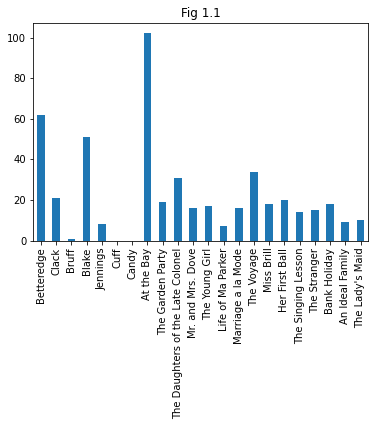

In [142]:
totalColorfulnessSeries = pd.Series(totalColorfulness)
totalColorfulnessSeries.plot(kind="bar",title="Fig 1.1")
print("Betteredge's narrative length: " + str(length(allTexts, "Betteredge")))
print("At the Bay length : " + str(length(allTexts, "At the Bay")))

<AxesSubplot:title={'center':'Fig 1.2'}>

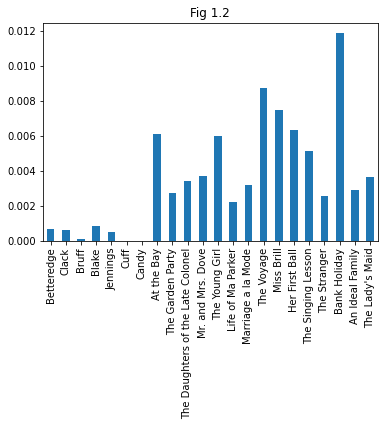

In [143]:
totalColorfulnessRatiosSeries = pd.Series(totalColorfulnessRatios)
totalColorfulnessRatiosSeries.plot(kind="bar",title="Fig 1.2")

Fig 1.1 displays the raw total counts of the number of color words found in each section. While interesting to see, the most important detail is that "At the Bay", despite being around six times shorter than Betteredge's narrative, has 40 more color terms. Fig 1.2 displays the proportion of color words to the total amount of tokens in each text. Here the stark difference in the number of color terms becomes evident. There is a significant difference in the overall usage of color terms that split "The Garden Party and Other Stories" and *The Moonstone*.

In Mansfield's "Bank Holiday", the story with the largest colors per token ratio, there are many sentences with multiple, descriptive color terms.

> A stout man with a pink face wears dingy white flannel trousers, a blue coat with a pink handkerchief showing, and a straw hat much too small for him, perched at the back of his head. (231)

> Lovely, streaming feathers, emerald green, scarlet, bright blue, canary yellow. Even the babies wear feathers threaded through their bonnets. (233) 

> Her face, a treasure of delicate carving, is tied in a green-and-gold scarf. (234)

"Bank Holiday" exists as somewhat of an antithesis to a traditional novel and plot structure. In the short span of around 1000 words, Mansfield introduces a whirlwind of setting details, possible characters, and interactions to emulate the chaos of a bank holiday celebration. Even reading the examples of the implementations of the color words will offer some insight into how disruptive and chaotic the story is. Significantly, there isn't a main protagonist and the story ends abruptly without a satisfying conclusion. The utilization of color is used to create both vibrancy and chaos in the setting. It is intentionally hard to interpret this story as there is sparse development or even introductions of characters. By employing these vibrant colors it instantly absorbs the reader into the setting, utilizing the detail to amplify and quicken the pace through chaos.

Contrastly, in *The Moonstone*, when compared to "The Garden Party and Other Stories", there seems to be a significant absence of color. When reading, however, it becomes clear that there isn't necessarily an absence of passages with descriptive colors, there just are a lot more words used in other ways. For example, take this passage from Betteredge's narrative that describes Rachel with many colors, specifically her appearance.

> In a minute more, Miss Rachel came downstairs—very nicely dressed in some soft yellow stuff, that set off her dark complexion, and clipped her tight (in the form of a jacket) round the waist. She had a smart little straw hat on her head, with a white veil twisted round it. She had primrose-coloured gloves that fitted her hands like a second skin. Her beautiful black hair looked as smooth as satin under her hat. (172)

However, it becomes evident that the narrators, and in turn Collins, are much more interested in the characters and their personal narratives. There are large passages of analyzing character behavior, dialogue among characters, and even personal interjections made by narrators that have little to do with the color of a certain item. Collins has the freedom to expand these characters and the plot through their interactions and thoughts, not having to set up an entirely new cast of characters, a setting, and other details every thousand words. Thus, there are a lot of passages about mystery, emotion, and more complex relationship dynamics. Also note despite there being many colors named, since they are all neutral, the reader doesn't feel the chaos when compared to "Bank Holiday". This might also be attributed to the objects being described, as proper clothing isn't quite as hectic as "lovely, streaming feathers".

In a way, since Mansfield's stories are so short, she leaves a lot up to the reader to interpret. She embeds nuggets of detail to convey her point, drawing interest to specific phrases, but doesn't have the facilities to explain a full plot, often leaving the story's main commentary not completely revealed. Her topics of choice are about class, marriage, youth, love, and other abstract human issues encapsulated in punchy, quick, short stories. While Collins certainly discusses issues like class and love in *The Moonstone*, the overarching plot is interested in the resolution of the mystery, thus resulting in words being allocated elsewhere. A further examination of the type of colors used reveals the usage of color terms as symbols with deeper meanings than aesthetic descriptors. 

array([<AxesSubplot:title={'center':'Fig 2.0'}>,
       <AxesSubplot:title={'center':'Fig 2.1'}>,
       <AxesSubplot:title={'center':'Fig 2.2'}>], dtype=object)

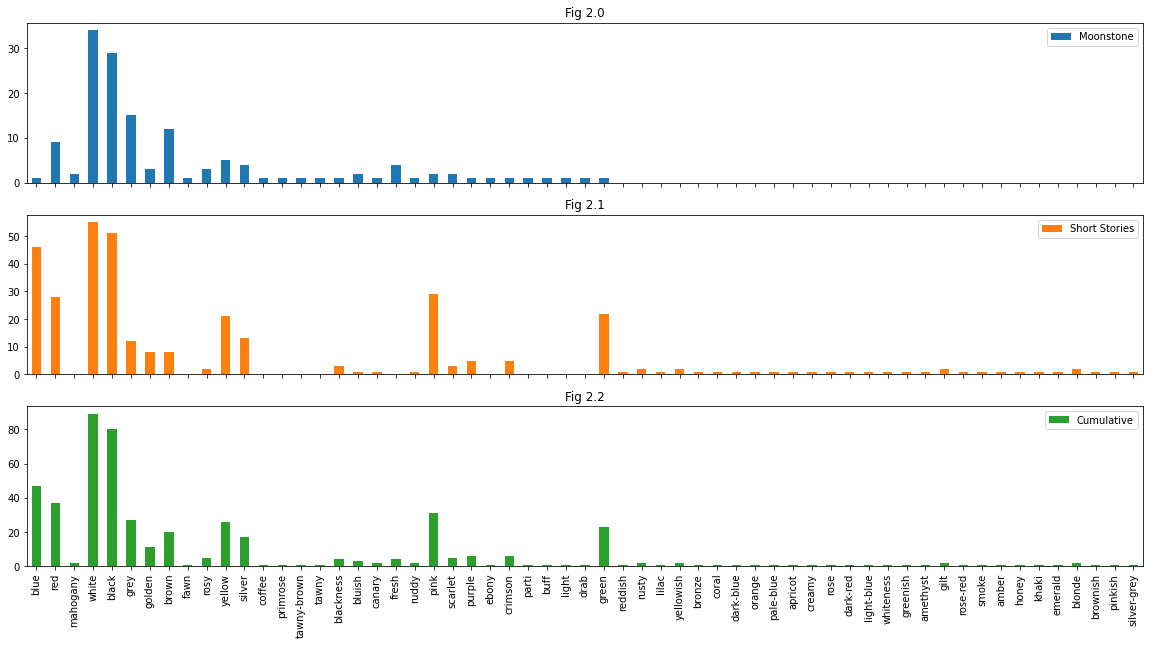

In [151]:
pd.DataFrame(colorComparison).plot(kind="bar", figsize=(20,10), title=["Fig 2.0", "Fig 2.1", "Fig 2.2"], subplots=True)

Fig 2.0 - 2.2 show the various distribution of the colors throughout the entire body of work. Strikingly, it is clear that in *The Moonstone* the most common colors are achromatic colors, the most frequent being white, black, and grey. Even the next most frequent color, brown, is neutral. In "The Garden Party and Other Stories" however, even though white and black are still the most popular, blue, green, pink, and red are also extremely prevalent. From a higher level understanding of the plots of these works, interpreting these findings is interesting. *The Moonstone* has a rather tragic plot with a lot of suspense, tension, and intrigue, which makes sense why black and white are extremely popular.  "The Garden Party and Other Stories" however has a variety of topics. It has stories of parties, nature, celebrations, death, sorrow, marriage, and regret. This varied subject topic opens up descriptive moments that introduce colors like blue, green, and pink. The usage of the colors largely reflects the overarching subject matter of the works. The use of these colors as symbols specifically can be interpreted by looking at specific narrations and stories. 

In [157]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue", "red", "maroon", "white", "black", "grey", "gold", "saddlebrown", "wheat", "pink", "yellow", "silver", "sienna", "lightpink"])

<AxesSubplot:title={'center':'Fig 3.1'}, ylabel='None'>

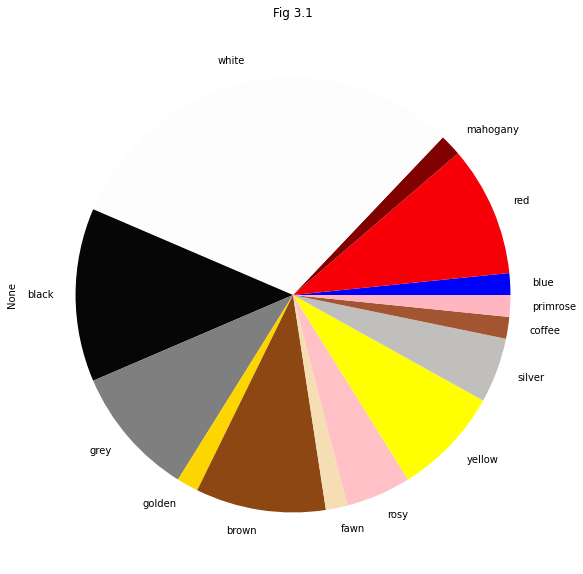

In [169]:
pd.Series(moonstoneColors["Betteredge"]).plot(kind="pie",colormap = cmap,figsize = (10, 10), title="Fig 3.1")

Fig 3.1 shows the distribution of colors in Betteredge's narrative, and looking at the usages of the colors reveals a lot about how colors are associated with certain topics. For example, white is the predominant color in Betteredge's narrative. Betteredge describes Godfrey as "beautiful red and white" (68) and while he gets ready for the birthday dinner he describes "Just as I had got my white waistcoat on, Penelope presented herself at my toilet, on pretence of brushing what little hair I have got left, and improving the tie of my white cravat" (77). Betteredge's usage of white reflects a sentiment of class, innocence, and purity. Godfrey, who Betteredge views as an excellent man in both looks and practice, is described as white to symbolize his precieved appearance as a good person. Betteredge also makes sure to emphasize his clean, new, white clothing to reflect his proudness of possessing clothing that someone of a higher class would wear. Furthermore, there are many instances where Blake and Rachel's white clothing is emphasized, also reflecting Betteredge's view of them. Blake is an honorable man in Betteredge's eyes, and throughout the investigation, Rachel's portrayal in white clothing reveals Betteredge's view that she is innocent of the crime. They are both of higher class status when compared to Betteredge.

Conversely, black seems to be a symbol of mystery, distrust, and ill-omen. For example, many instances of the usage of black are in the context of describing Sergeant Cuff, the most mysterious, enigmatic character in Betteredge's narrative. The following excerpt serves as an excellent example of how the usage of black not only intensifies the scene but creates associations of mystery and shock to Cuff while foreshadowing danger with the description of the weather. 

> As I got near the shore, the clouds gathered **black**, and the rain came down, drifting in great white sheets of water before the wind. I heard the thunder of the sea on the sand-bank at the mouth of the bay. A little further on, I passed the boy crouching for shelter under the lee of the sand hills. Then I saw the raging sea, and the rollers tumbling in on the sand-bank, and the driven rain sweeping over the waters like a flying garment, and the yellow wilderness of the beach with one solitary **black** figure standing on it—the figure of Sergeant Cuff. (Collins 185)

In [170]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue", "green", "yellow", "white", "silver", "pink", "crimson", "saddlebrown", "black", "red"])

<AxesSubplot:title={'center':'Fig 3.2'}, ylabel='None'>

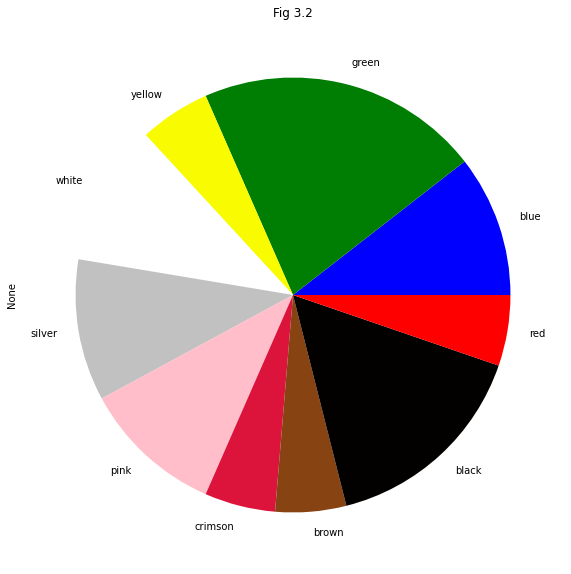

In [171]:
pd.Series(shortstoryColors["The Garden Party"]).plot(kind="pie",colormap = cmap,figsize = (10, 10), title="Fig 3.2")

Similar to the color symbolism found in Betteredge's narrative, color symbolism can be found in Mansfield's story. Fig 3.2 shows the color distribution in "The Garden Party". By simply looking at the distribution many of the colors make sense in the context of the story. The story does include a garden party, which is why more bright, floral colors are included like pink and green. The colors blue and yellow are in the context of describing the nature around the hosts. Despite these bright colors, there is a decent usage of black, which arrives in the conflict of the story, when Laura finds out about the dead man.

>"I don't understand," said Laura, and she walked quickly out of the room into her own bedroom. There, quite by chance, the first thing she saw was this charming girl in the mirror, in her black hat trimmed with gold daisies, and a long black velvet ribbon. (74)

This black trimming symbolizes the uncertainty that Laura feels when her family acts unsympathetic towards the death. She feels conflicted because she finds it wrong to be celebrating a garden party when someone has died, despite her family telling her to get over it. In many ways, this is Laura's introduction to the negative aspects of life, no longer protected by the protective bubble of class. When Laura visits the deceased's family, the woman that greets her is described as "A little woman in black showed in the gloom" (80). Black here symbolizes the mourning and sadness felt by the woman, the absence of life and color as portrayed so vibrantly in the story. 

In both *The Moonstone* and "The Garden Party" black is associated with negative emotions, showing the larger connection that colors have in culture. Other connections can be found with other colors. For example in "The Garden Party", white is also associated with class in the description "The road gleamed white, and down below in the hollow the little cottages were in deep shade" (78). The white road was only for the rich, symbolizing class and purity, while the cottages of the commoners are in the absence of white. Furthermore, while the usage of red is used as a descriptor for objects, it is also used as a descriptor for emotion. In both *The Moonstone* and "The Garden Party and Other Stories" red is used to describe characters that are angry, embarrassed, or flushed with emotion. 

> She was blushing of a deeper red than ever. (Collins 36)

> By this time Lottie was very red in the face and breathing heavily. (Mansfield 13)

> With her red cheeks and bright eyes she looked like a rooster. (Mansfield 39)

Ultimately color is a powerful tool utilized by both authors to add complexity to the various topics of commentary, whether it be class, death, or love. The explorations done in this project definitely portray that short stories are much more colorful than novels, which when considering the goals of their respective genres, makes intuitive sense. Mansfield's short stories are often very symbolic, quickly developed, and have heavy connections with their settings. Collin's novel is focused on the true mystery of the Moonstone, and the different narratives offer for unique character and plot development, centering itself on the characters. There is simply a lot more dialogue and context covered in *The Moonstone* which leaves less room for the more romantic descriptions like Mansfield's portrayal. This could also be attributed to the different styles of writing between Collins and Mansfield. This would require a large collection of both authors' texts to find their individual colorfulness. Maybe a comparison can be done between these authors and other similar authors in the literary world to see which authors are most colorful. When looked at in context, it is amazing to see how colors and their connotations have transcended individual texts and become almost culturally accepted. A majority of people will associate certain colors with certain emotions and topics, and writers have used these associations to not only bring more life to their writing but also add deeper layers of complexity. 

**Works Cited**

Collins, Wilkie. *The Moonstone*. *Project Gutenberg*, Jan 12, 2006, https://www.gutenberg.org/files/155/155-h/155-h.htm.


Mansfield, Katherine. "The Garden Party and Other Stories." *Project Gutenberg*, Aug 20, 2008, https://www.gutenberg.org/files/1429/1429-h/1429-h.htm.
